In [8]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Accessing all the datasets
path=[]


#Storing the paths in a array
for i in range(1951,2023):
    path.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Data\RF25_ind{i}_rfp25.nc")

    
#Accessing all the datasets and storing all data in all_data list
all_data=[]
for i in path:
    temp = xarray.open_dataset(i)
    all_data.append(temp)




In [11]:
all_data[0]

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 1951-01-01 1951-01-02 ... 1951-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

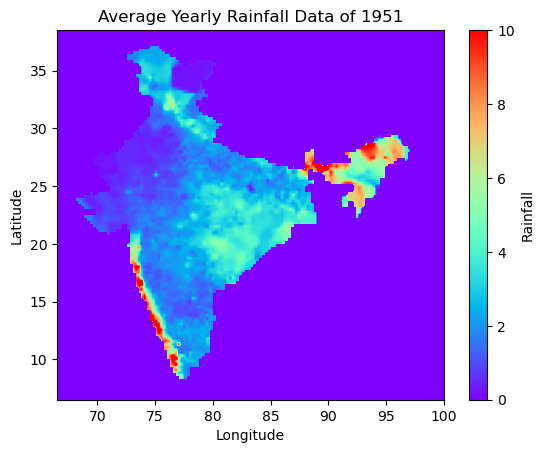

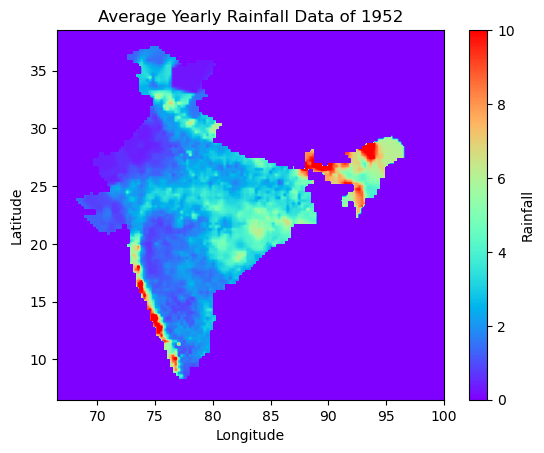

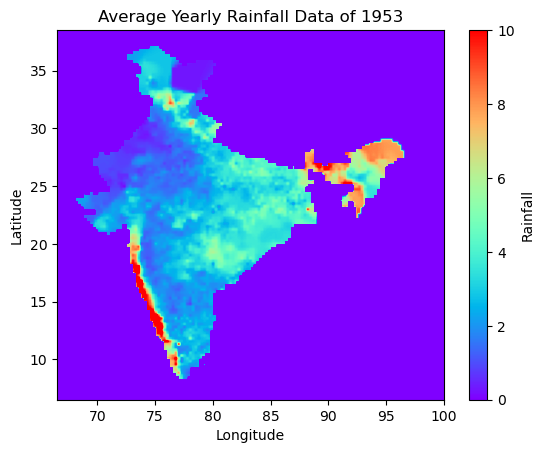

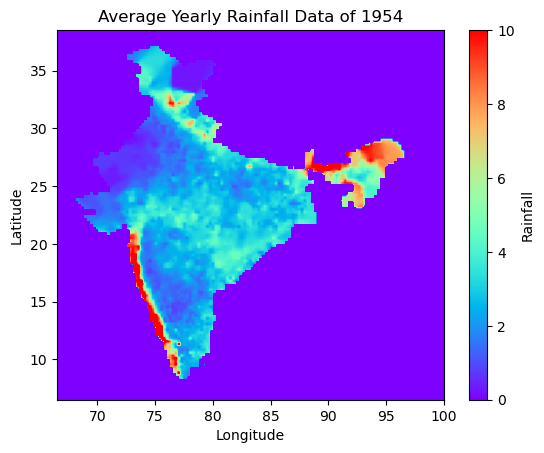

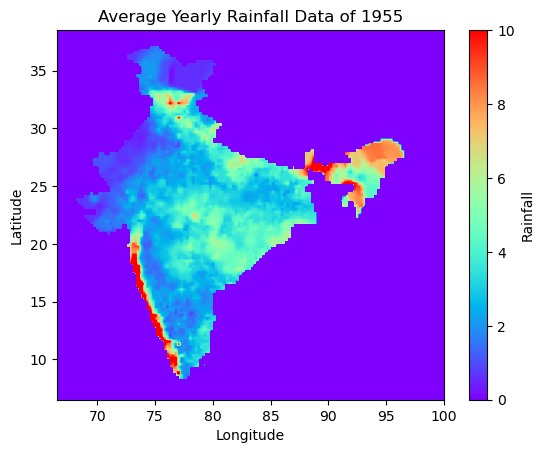

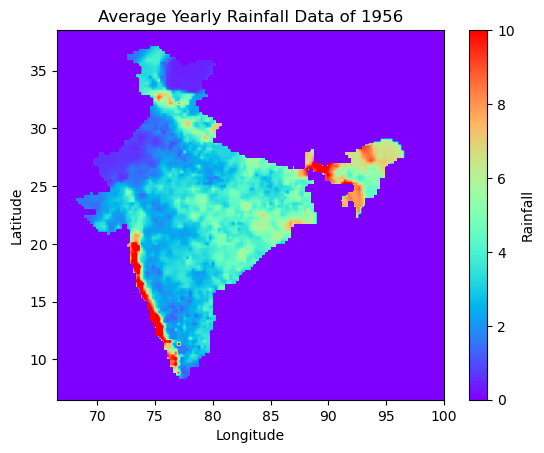

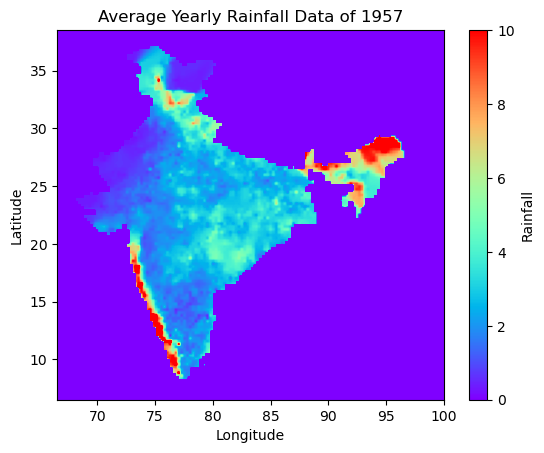

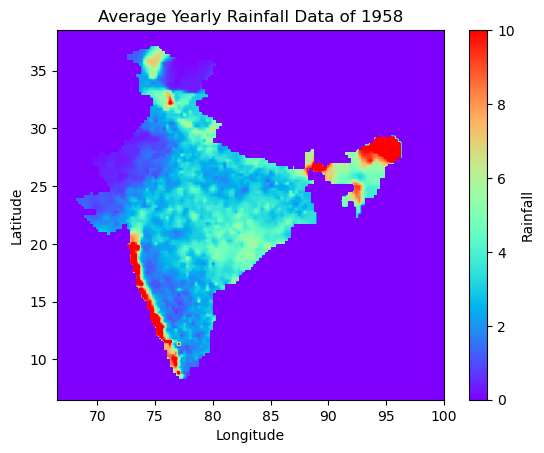

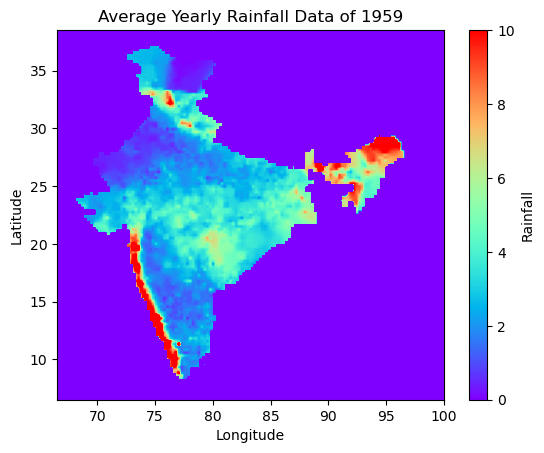

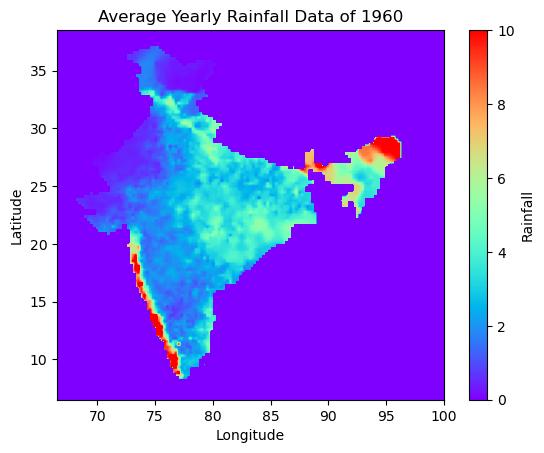

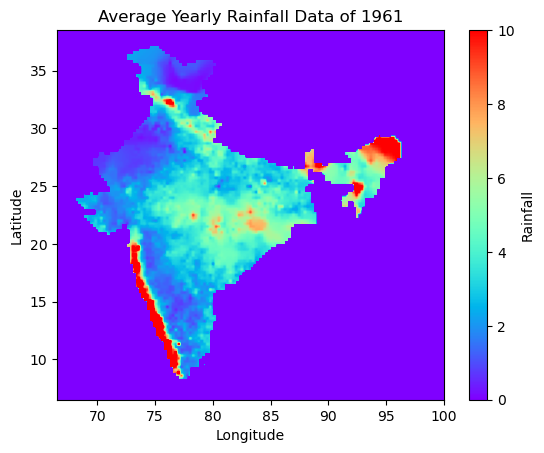

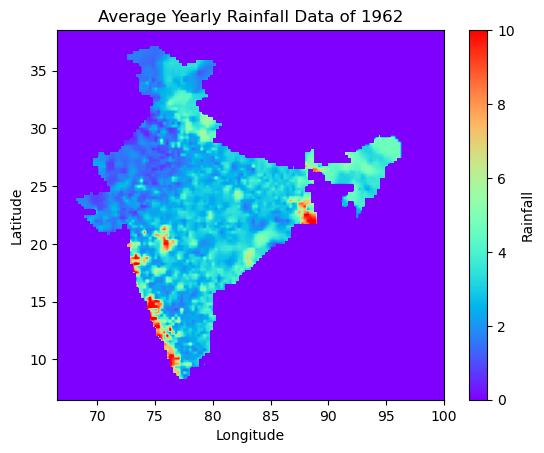

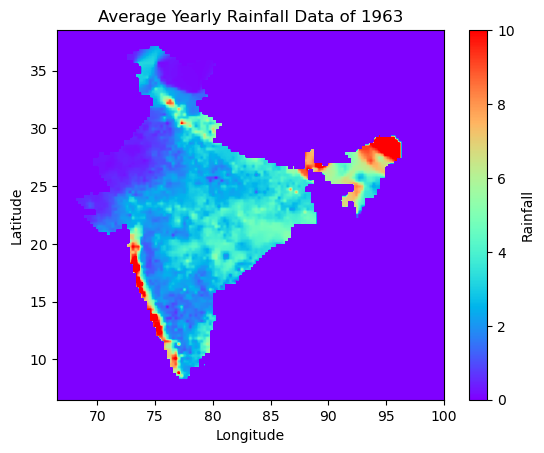

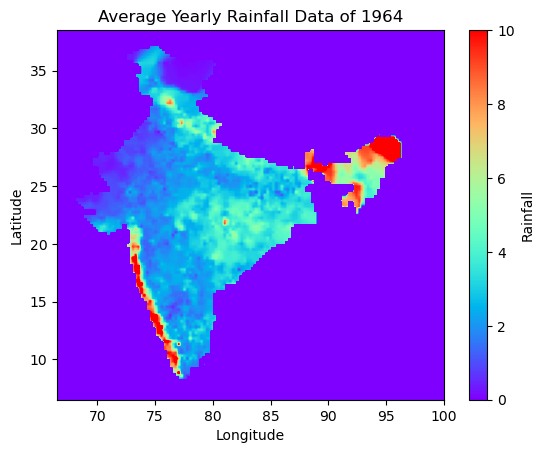

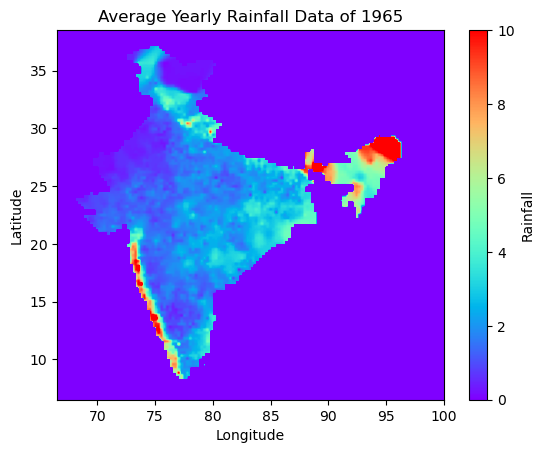

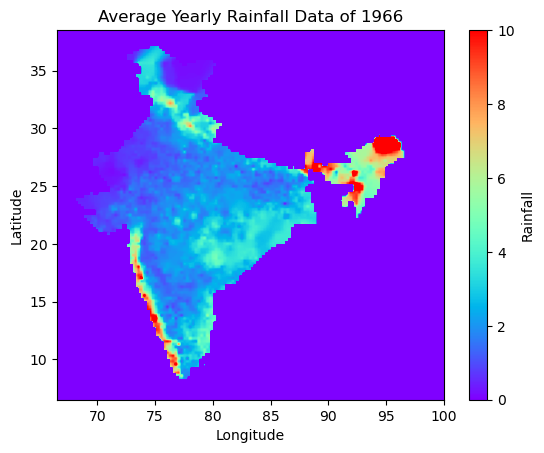

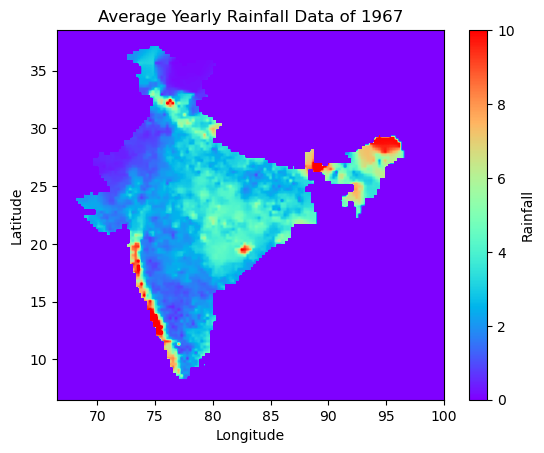

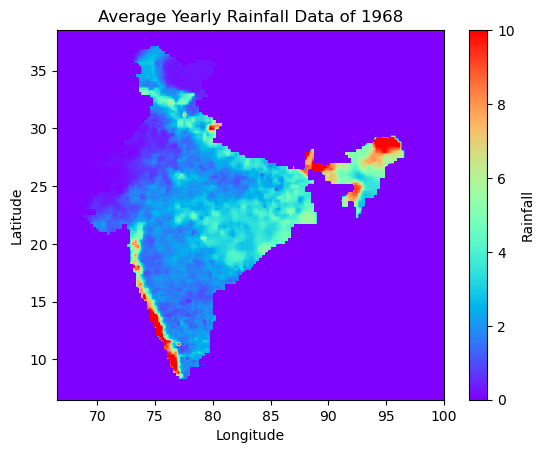

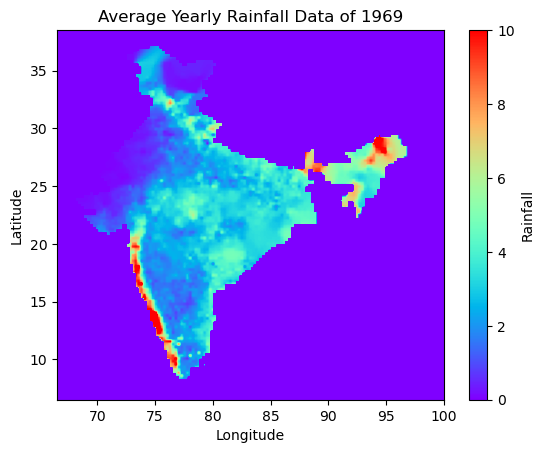

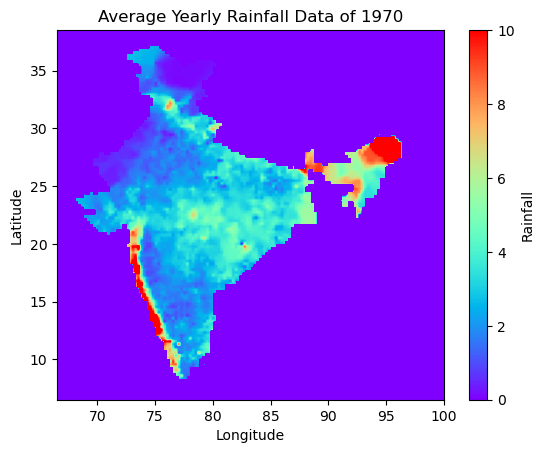

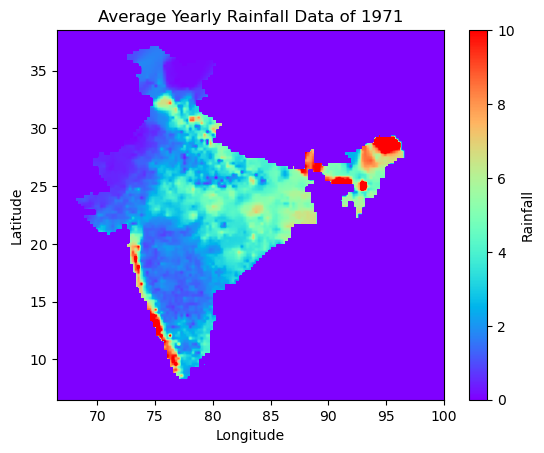

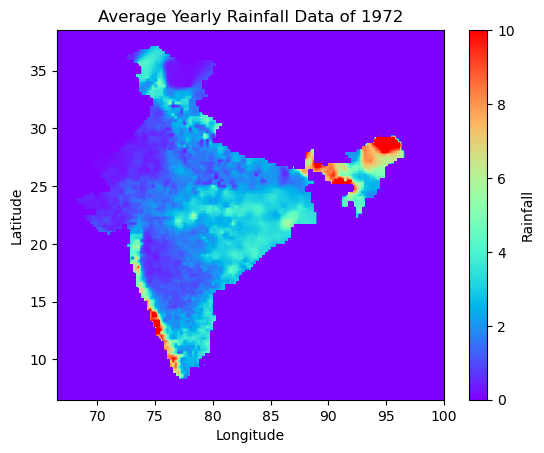

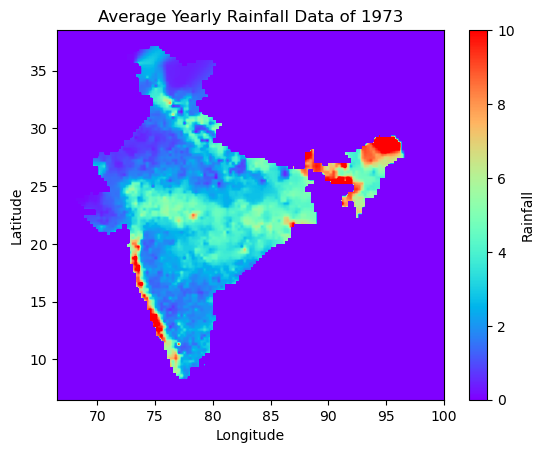

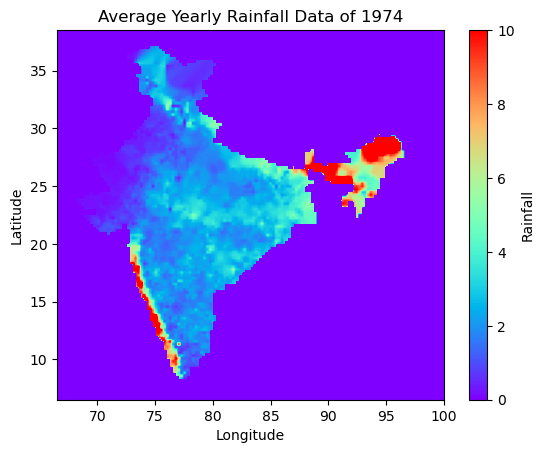

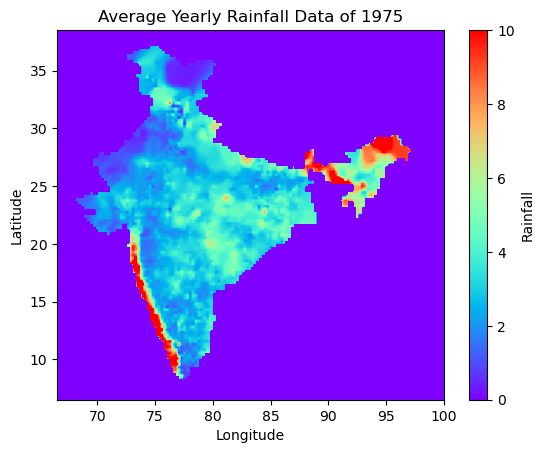

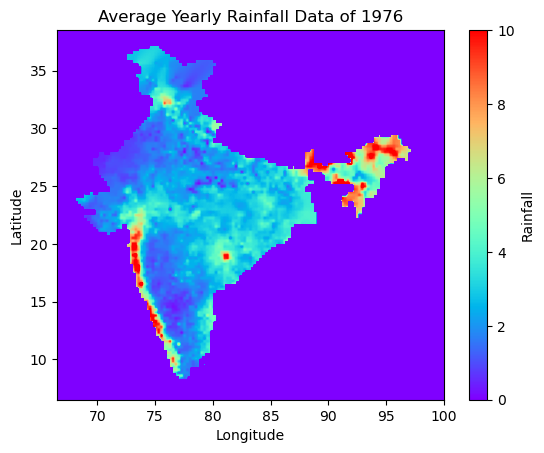

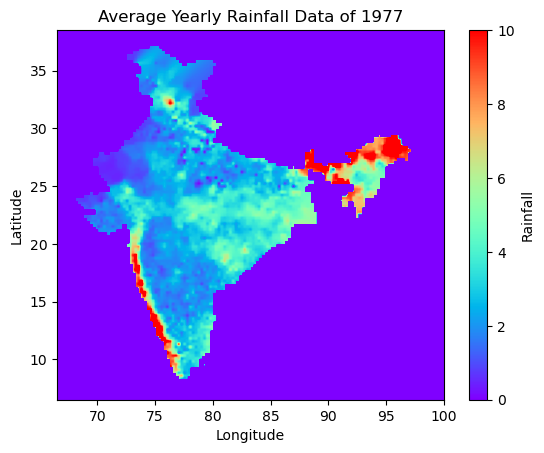

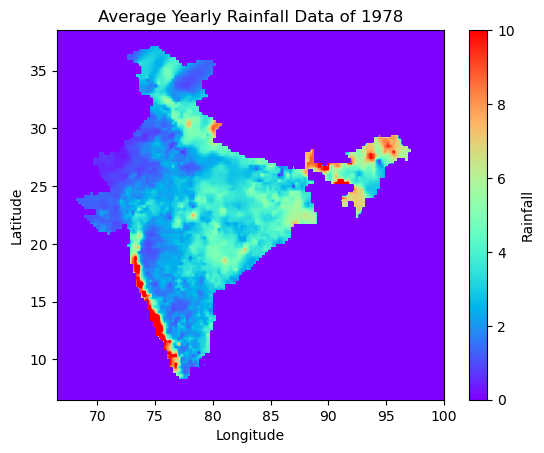

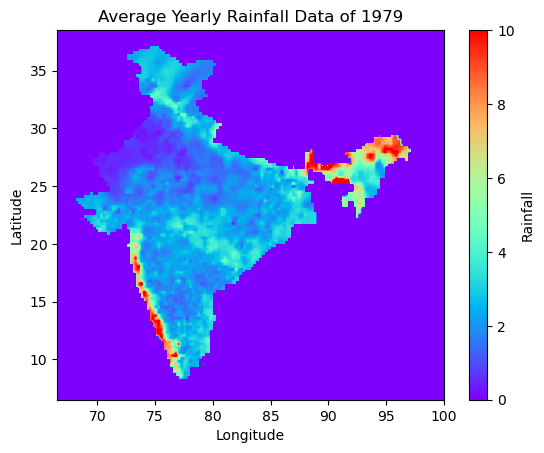

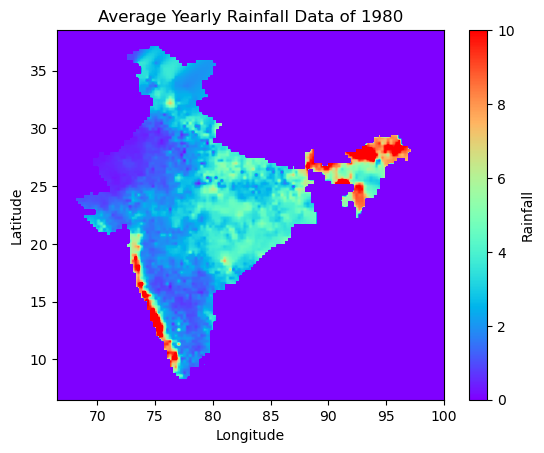

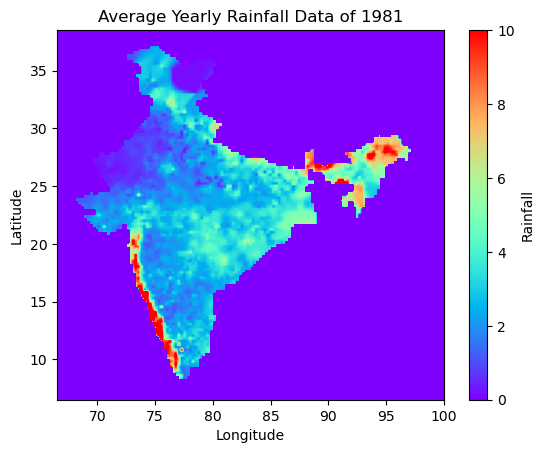

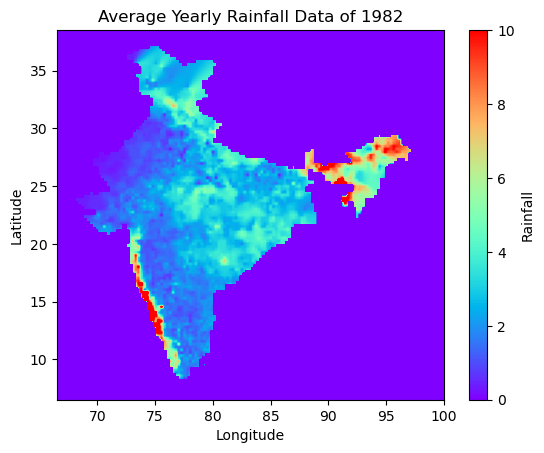

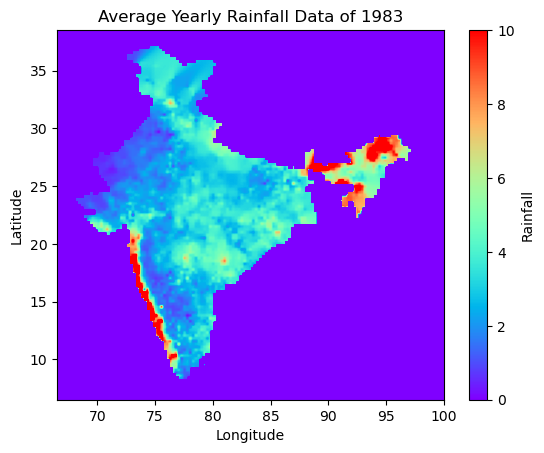

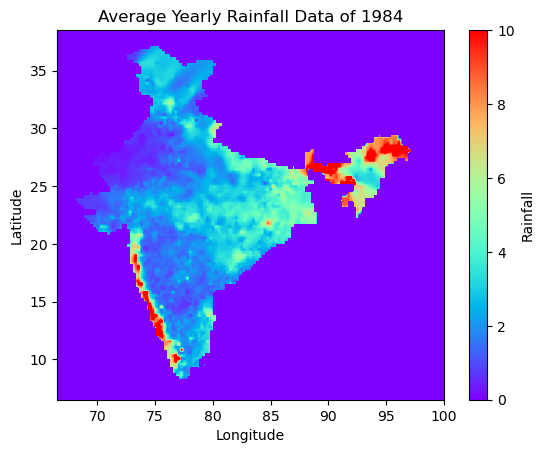

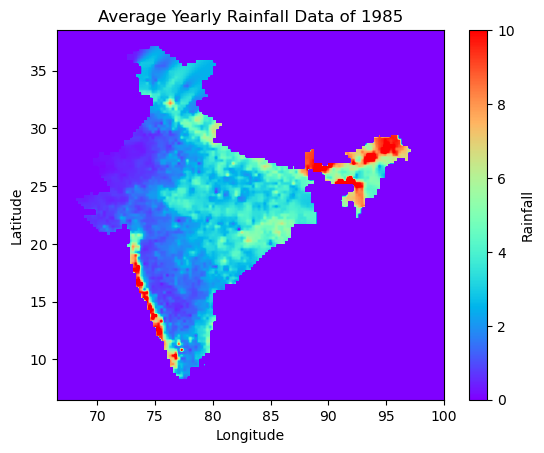

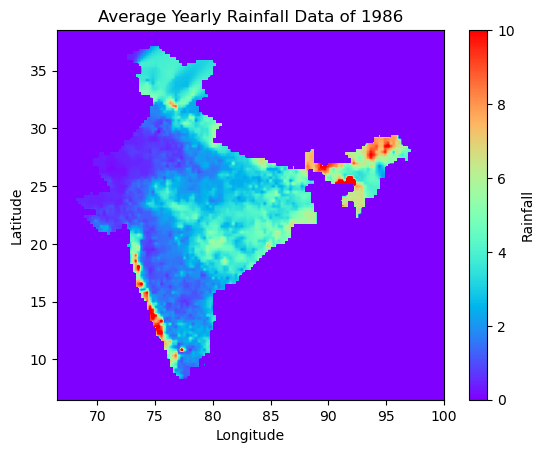

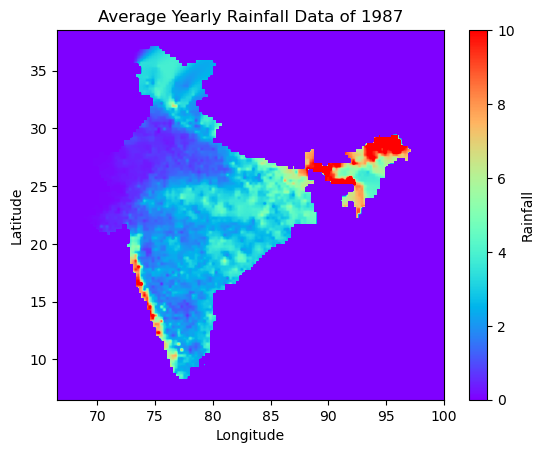

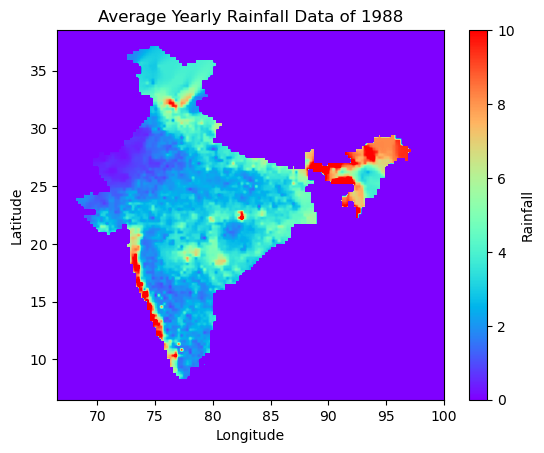

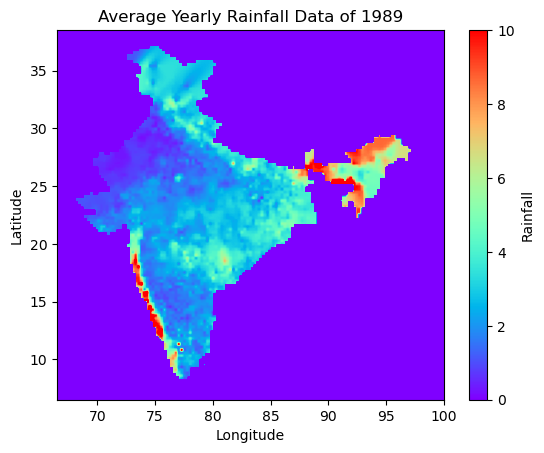

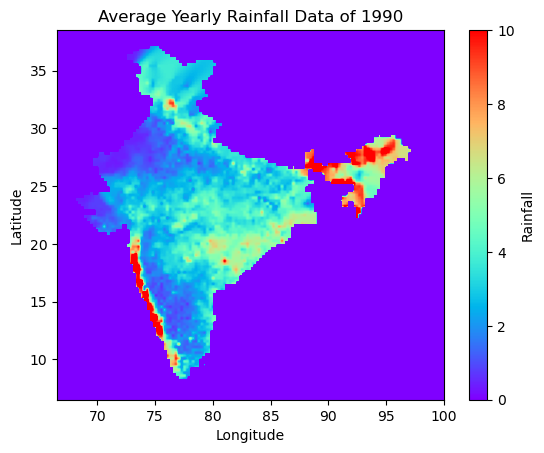

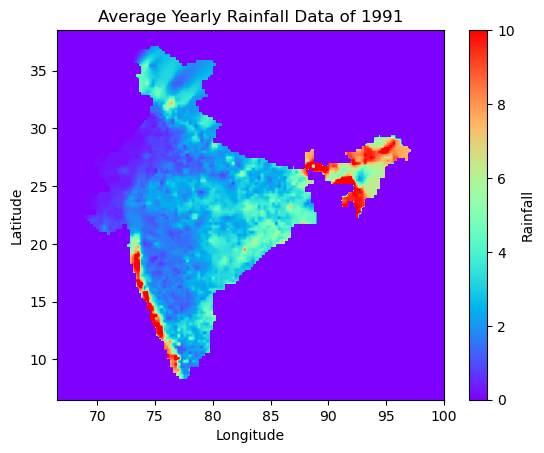

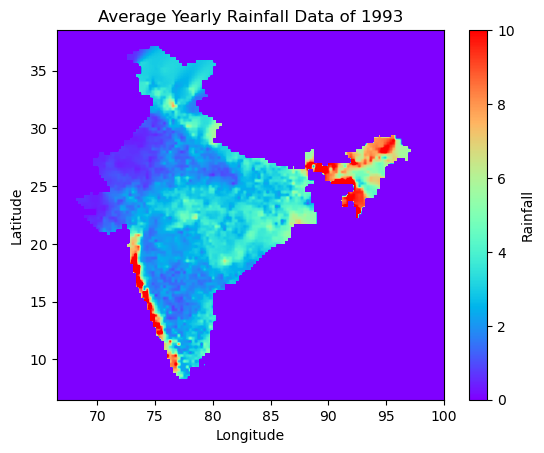

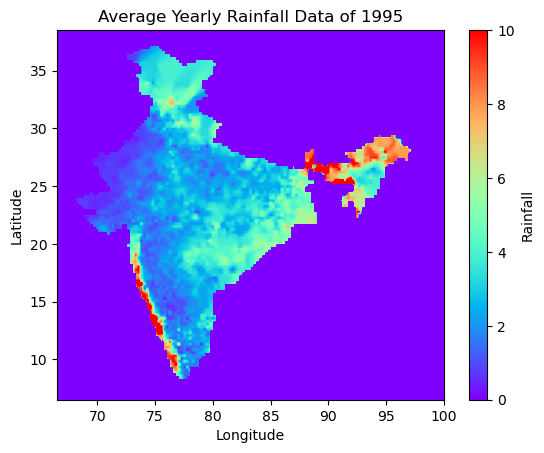

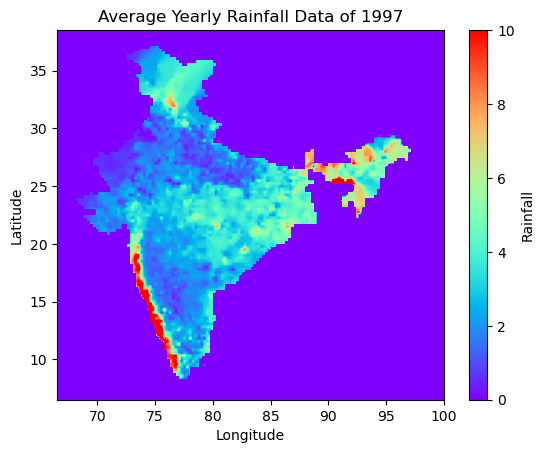

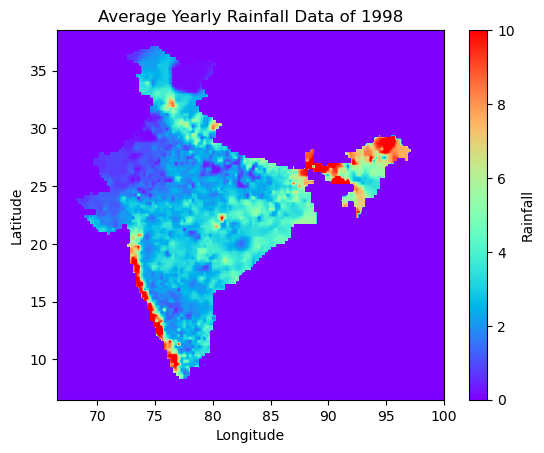

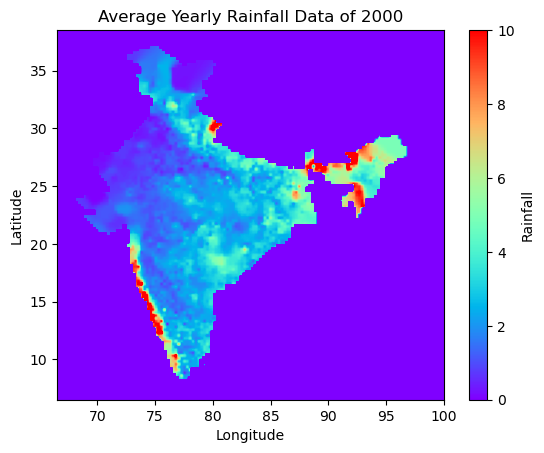

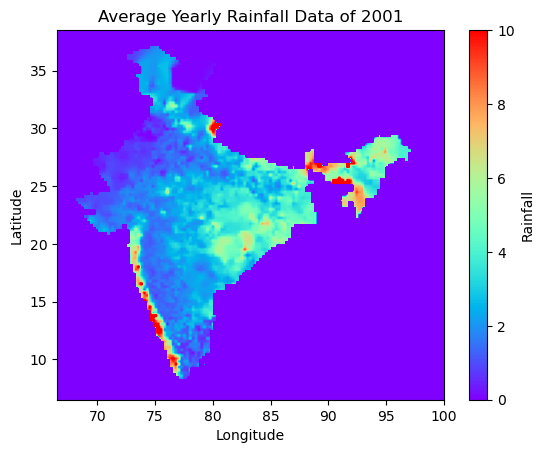

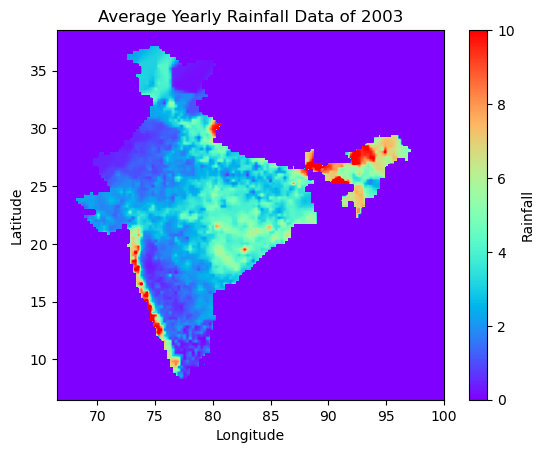

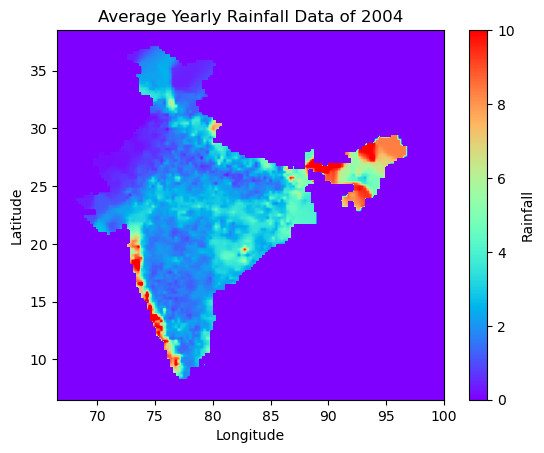

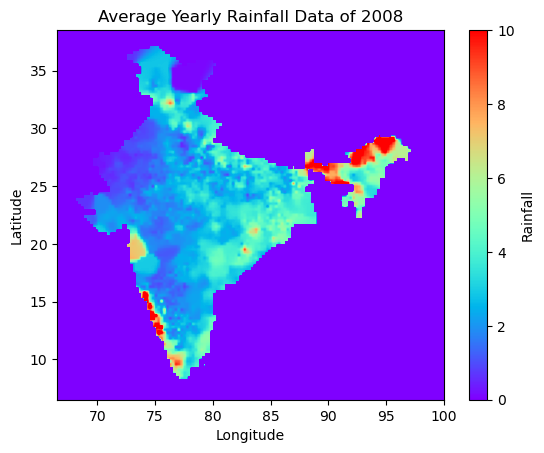

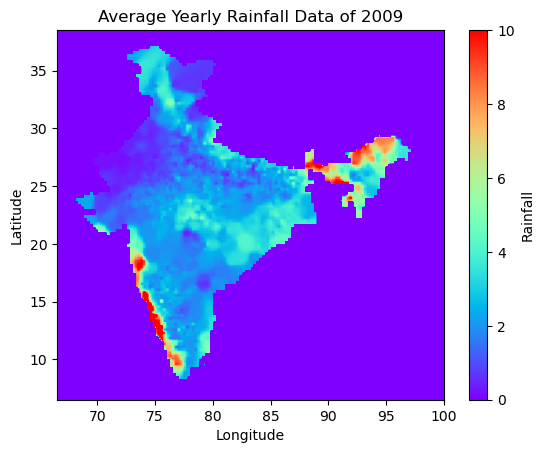

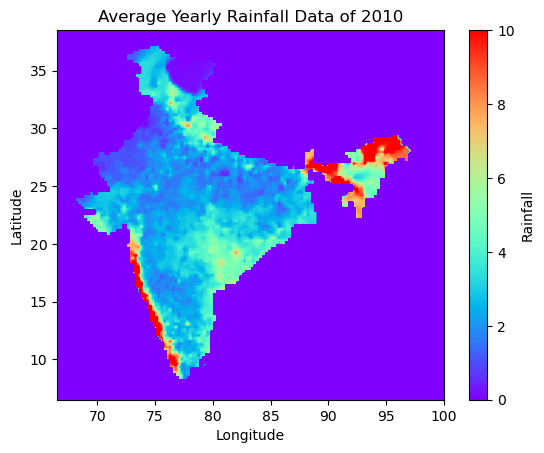

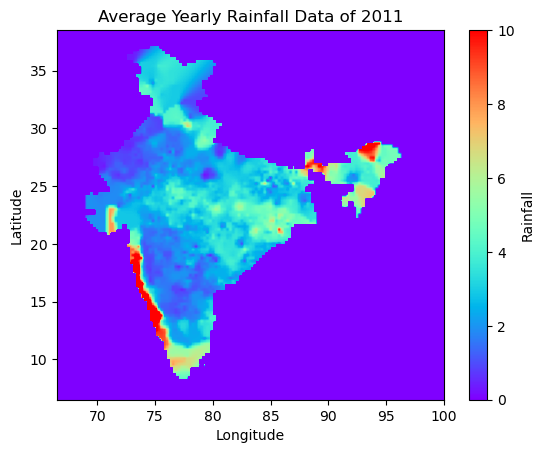

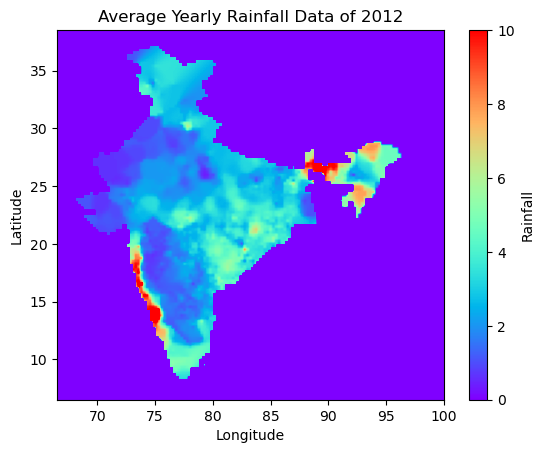

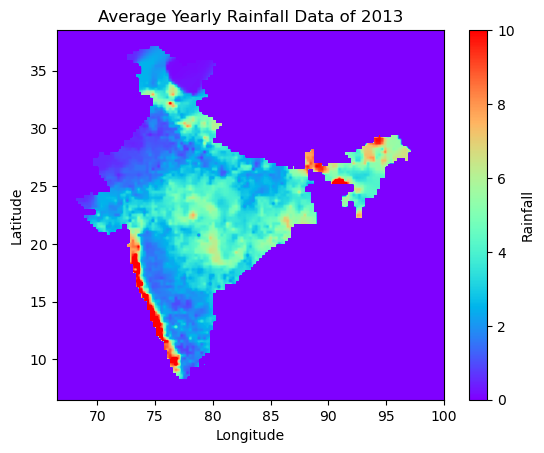

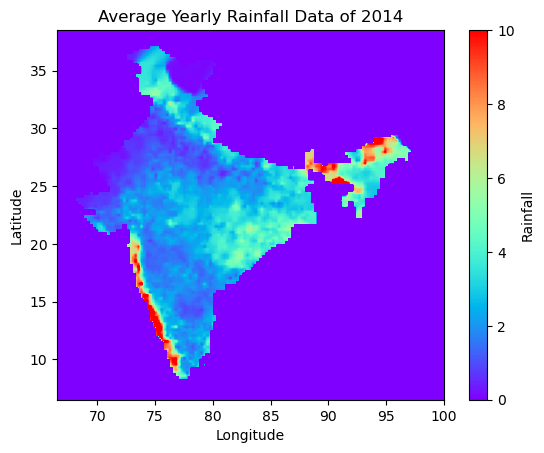

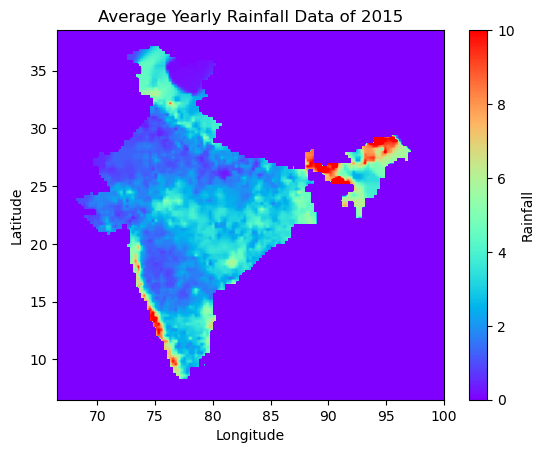

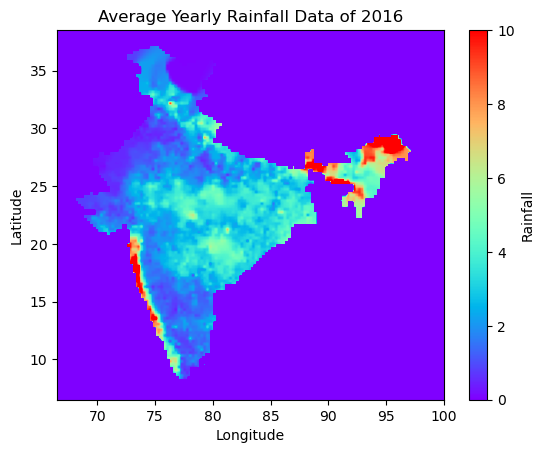

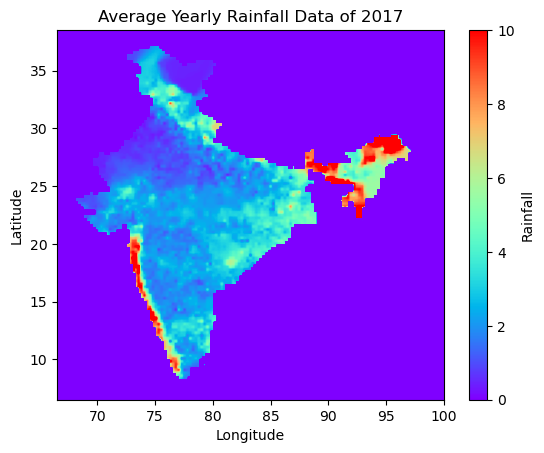

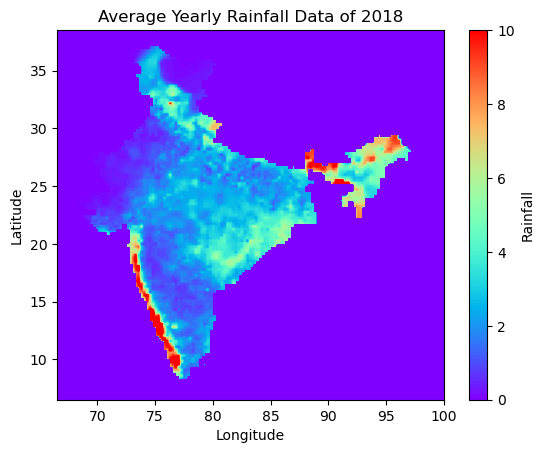

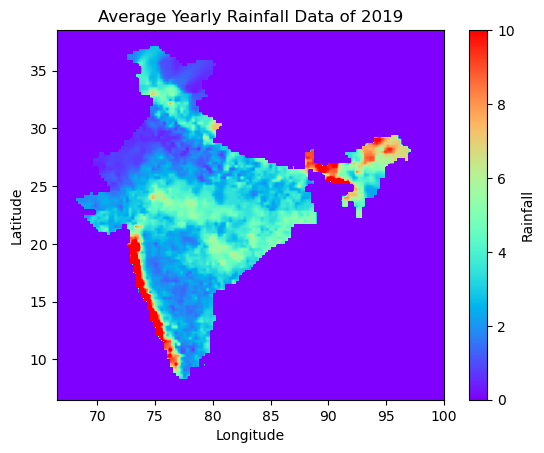

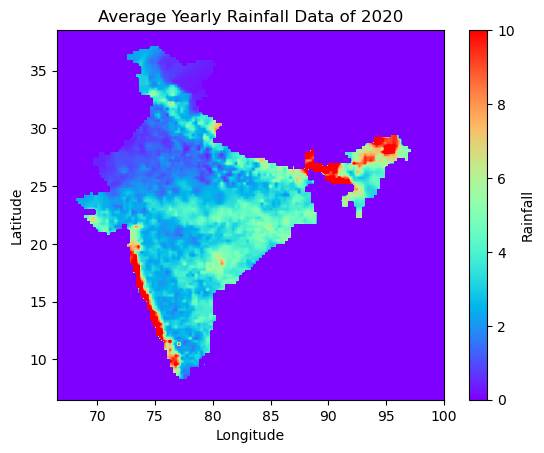

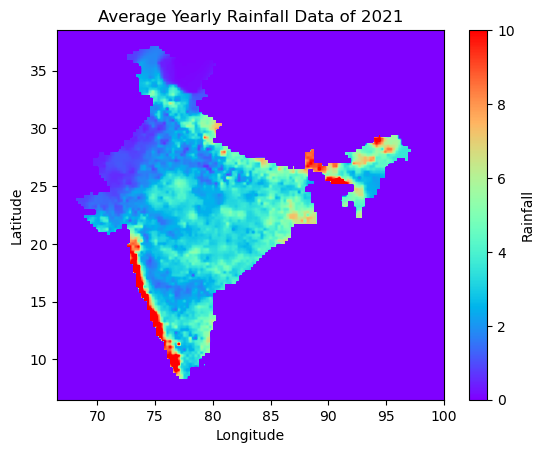

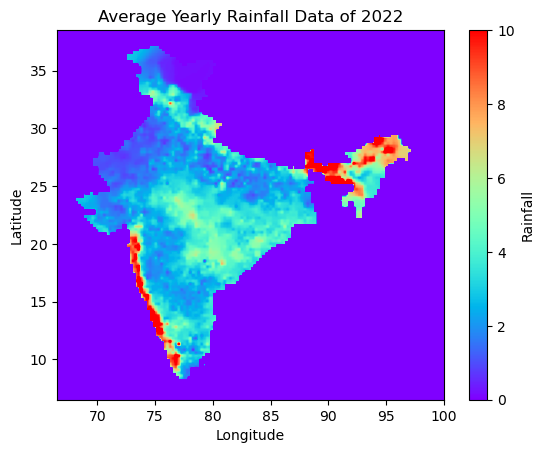

In [31]:
#Plotting the mean of every year from 1951 to 2022
yr=1951
all_data_mean=[]
inst=0
for i in all_data:
    #Extract the rainfall data variable
    rainfall_data = i['RAINFALL']
    
    # Calculate the mean rainfall over the entire year
    all_data_mean.append(rainfall_data.mean(dim='TIME'))
    
    #No nan values
    all_data_mean[inst]= all_data_mean[inst].where(all_data_mean[inst].notnull(), -999)    

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 0.0  # Minimum value for the color scale
    vmax = 10.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(all_data_mean[inst], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[df['LONGITUDE'].min(), df['LONGITUDE'].max(),
                           df['LATITUDE'].min(), df['LATITUDE'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Average Yearly Rainfall Data of {yr}')
    yr+=1
    inst+=1
    # Show the plot
    plt.show()

In [32]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(np.array(all_data_mean[0]))
#all_data_mean[0].shape

[[-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.990

In [33]:
import pandas as pd
from sklearn.cluster import KMeans

#Creating a k means object with 9 clusters
km = KMeans(n_clusters=9, n_init='auto')
km

KMeans(n_clusters=9, n_init='auto')

In [51]:
rainfall_flattened=[] 

#Flattening the rainfall mean data to fit into the kmeans object
for i in all_data_mean:
    rainfall_flattened.append(i.stack(lat_lon=('LATITUDE', 'LONGITUDE')))

print(np.array(rainfall_flattened).shape)

(72, 17415)


In [49]:
#Trainig into the 
rainfall_clusters = km.fit_predict(rainfall_flattened)

array([2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 4, 7, 7, 5, 5, 7, 5, 5, 7, 7, 5, 7, 1, 3, 1, 1, 6, 1, 1, 0, 0, 1, 8, 8, 8, 1, 1, 1, 1, 1, 6, 1, 6, 1, 1, 6, 1, 2, 2, 1, 1, 1, 2, 1, 6, 2, 1, 5, 3, 2, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3])